## Assignment: PCA Implementation

#### Objective:

The objective of this assignment is to implement PCA on a given dataset and analyse the results.

#### Instructions:

Download the wine dataset from the UCI Machine Learning Repository

(https://archive.ics.uci.edu/ml/datasets/Wine).

Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.

#### Deliverables:

Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.

#### Additional Information:

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols',
           'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue',
           'OD280/OD315 of Diluted Wines', 'Proline']
df=pd.read_csv(url,names=columns)

In [4]:
df.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
features=df.drop('Class',axis=1)
target=df['Class']

In [6]:
scaller=StandardScaler()

In [7]:
x_scaled=scaller.fit_transform(features)

In [8]:
pca=PCA()

In [9]:
x_pca=pca.fit_transform(x_scaled)

In [11]:
explained_variance_ratio=pca.explained_variance_ratio_
commulative_variance_ratio=np.cumsum(explained_variance_ratio)

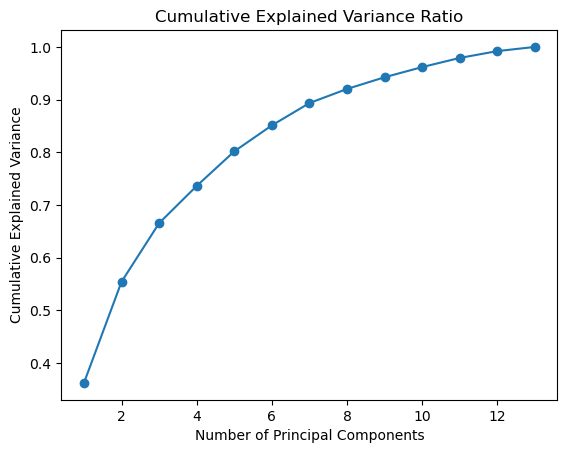

In [13]:
plt.plot(range(1, len(explained_variance_ratio) + 1), commulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

In [15]:
n_components = np.argmax(commulative_variance_ratio >= 0.95) + 1
print("Number of Principal Components to retain:", n_components)

Number of Principal Components to retain: 10


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_pca[:, :n_components])
labels = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


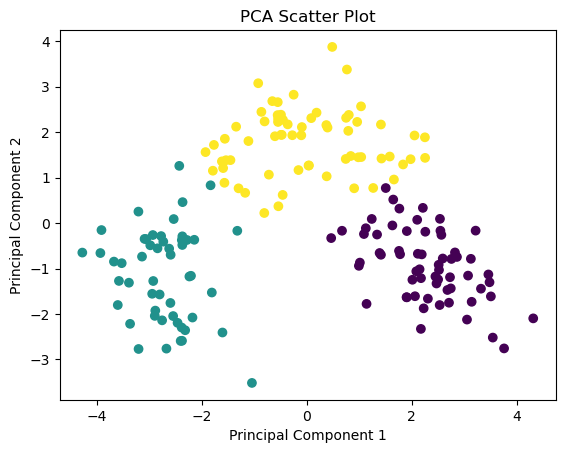

In [18]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

you should see the cumulative explained variance plot, which helps determine the optimal number of principal components to retain. The scatter plot shows the data points projected onto the first two principal components, with different colors representing the clusters assigned by the K-Means algorithm.

Feel free to further analyze the results, interpret the clustering analysis, and report any additional performance metrics or findings based on your specific requirements.